In [2]:
import osmnx as ox
import networkx as nx

C:\Users\Kyusang\anaconda3\envs\ox\Lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 111 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


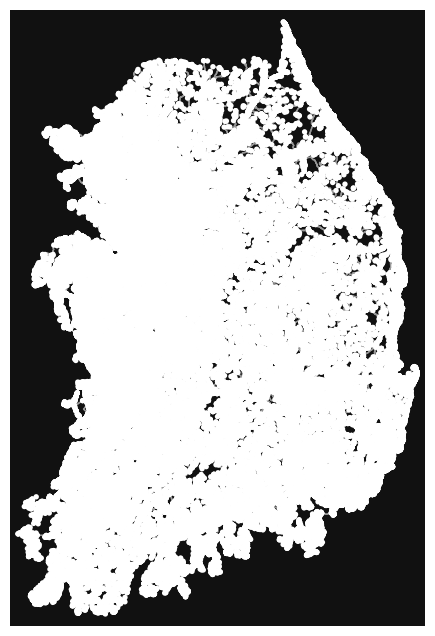

In [55]:
G = ox.graph_from_place("Korea", network_type = "drive")
fig, ax = ox.plot_graph(G)

# Routing

In [50]:
# impute missing edge speed and calculate edge travel times
G = ox.routing.add_edge_speeds(G)
G = ox.routing.add_edge_travel_times(G)

In [51]:
orig = ox.distance.nearest_nodes(G, X=127.785, Y=36.97289)
dest = ox.distance.nearest_nodes(G, X=127.791, Y=36.97112)

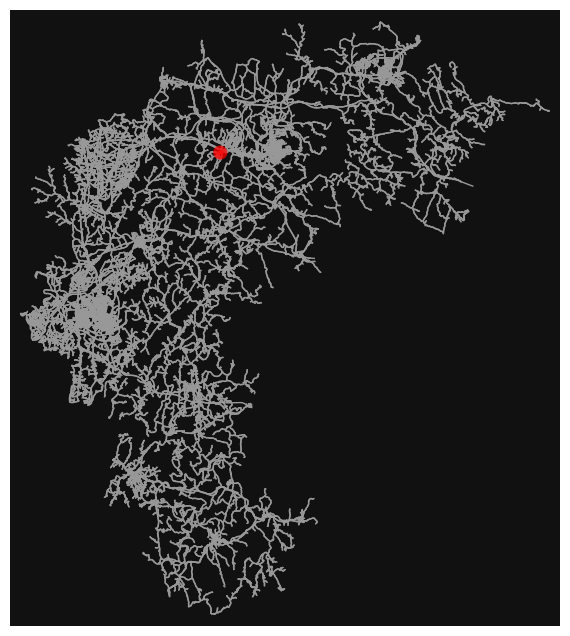

In [52]:
# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.routing.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [53]:
route_time = sum(ox.routing.route_to_gdf(G, route, weight="travel_time")["travel_time"])
route_time

15.8

In [54]:
ox.routing.route_to_gdf(G, route, weight="travel_time")

,,,osmid,highway,oneway,reversed,length,speed_kph,travel_time,geometry
u,v,key,,,,,,,,
11826433164,436614107,0,659753784,residential,False,True,10.876,38.1,1.0,"LINESTRING (127.78879 36.97113, 127.78890 36.9..."
436614107,5618283290,0,659753784,residential,False,True,156.250,38.1,14.8,"LINESTRING (127.78890 36.97108, 127.79043 36.9..."
